In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
%matplotlib inline

In [125]:
import sklearn.linear_model as linear_model
import sklearn.tree as tree
import sklearn.naive_bayes as naive_bayes
import sklearn.neighbors as neighbors
import sklearn.cross_validation as cv

In [15]:
def line(x, y, a, b, c):
    return a*x + b*y + c

def line_color(line_func, *x, random_coef = 0.):
    if line_func(*x) + random_coef * (np.random.rand(1) - 0.5) >= 0:
        return 1
    return 0

def quadratic(x, y, x0, y0, a, b, c):
    return a * np.square(x - x0) + b * np.square(y - y0) + c

def quad_color(quad_func, *x, random_coef = 0.):
    if quad_func(*x) + random_coef * (np.random.rand(1) - 0.5) >= 0:
        return 1
    return 0

## Generate and plot data

In [146]:
# let there be data
N = 1500
X = np.random.rand(N, 2)
y = np.empty(N)
q = np.empty(N)
r = np.empty(N)

L = lambda x, y: line(x, y, a = 1.2, b = 0.8, c = -1)
Q = lambda x, y: quadratic(x, y, x0 = 0.6, y0 = 0, a = 2, b = 2, c = -0.5)
C = lambda x, y: quadratic(x, y, x0 = 0.5, y0 = 0.5, a = 1, b = 1, c = -0.05)

for i in range(N):
    y[i] = line_color(L, *X[i], random_coef = 0.5)
    q[i] = quad_color(Q, *X[i], random_coef = 0.5)
    r[i] = quad_color(C, *X[i], random_coef = 0.1)

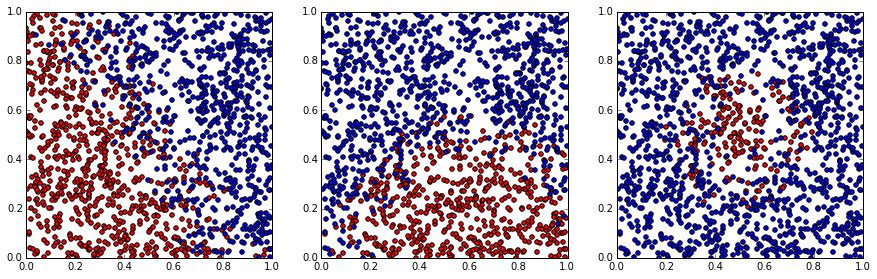

In [147]:
DATASETS = 3
fig, ax = plt.subplots(1, DATASETS, figsize = (15, 5))
for a in range(DATASETS):
    ax[a].set(aspect = 1., xlim = (0,1), ylim = (0,1))
    
X_0_line = np.array([X[i] for i, c in enumerate(y) if c == 0])
X_1_line = np.array([X[i] for i, c in enumerate(y) if c == 1])

_tmp = ax[0].scatter(X_0_line[:,0], X_0_line[:,1], c = "red")
_tmp = ax[0].scatter(X_1_line[:,0], X_1_line[:,1], c = "blue")

###

X_0_quad = np.array([X[i] for i, c in enumerate(q) if c == 0])
X_1_quad = np.array([X[i] for i, c in enumerate(q) if c == 1])

_tmp = ax[1].scatter(X_0_quad[:,0], X_0_quad[:,1], c = "red")
_tmp = ax[1].scatter(X_1_quad[:,0], X_1_quad[:,1], c = "blue")

###

X_0_ckle = np.array([X[i] for i, c in enumerate(r) if c == 0])
X_1_ckle = np.array([X[i] for i, c in enumerate(r) if c == 1])

_tmp = ax[2].scatter(X_0_ckle[:,0], X_0_ckle[:,1], c = "red")
_tmp = ax[2].scatter(X_1_ckle[:,0], X_1_ckle[:,1], c = "blue")

## Test classifiers

In [148]:
def test_classifiers(X, y, max_knn, ax, train_size = 0.8):
    X_train, X_test, y_train, y_test = cv.train_test_split(X, y, train_size = 0.8)
    N_train = len(y_train)
    N_test = len(y_test)

    # Linear Regresion (LR)
    log_regr_model = linear_model.LogisticRegression()
    log_regr_model.fit(X_train, y_train)
    log_regr_pred = log_regr_model.predict(X_test)
    log_regr_score = np.mean(log_regr_pred == y_test)

    # Naive Bayes (NB)
    nb_model = naive_bayes.GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_pred = nb_model.predict(X_test)
    nb_score = np.mean(nb_pred == y_test)

    # k-Nearest-Neighors (kNN)
    scores_knn = []
    for k in range(1, max_knn):
        knn_model = neighbors.KNeighborsClassifier(n_neighbors = k)
        knn_model.fit(X_train, y_train)
        knn_pred = knn_model.predict(X_test)
        knn_score = np.mean(knn_pred == y_test)
        scores_knn.append((k, knn_score))
        
    # Decision Trees (DT)
    scores_tree = []
    tree_model = tree.DecisionTreeClassifier()
    tree_model.fit(X_train, y_train)
    tree_pred = tree_model.predict(X_test)
    tree_score = np.mean(tree_pred == y_test)


    xx = [e[0] for e in scores_knn]; MAX_X = max(xx)
    yy = [e[1] for e in scores_knn]
    ax.set(title = 'kNN', xlabel = 'k', ylabel = 'performance')
    ax.set(ylim = (0.45, 1.0)) # 0.9 * min(log_regr_score, nb_score, min(yy))
    LW = 2
    _tmp = ax.plot(xx, yy, color = "blue", label = "kNN", lw = LW)
    _tmp = ax.plot((0, MAX_X), (log_regr_score, log_regr_score),
                   color = "red", label = "LR", lw = LW)
    _tmp = ax.plot((0, MAX_X), (nb_score, nb_score),
                   color = "green", label = "NB", lw = LW)
    _tmp = ax.plot((0, MAX_X), (tree_score, tree_score),
                   color = "purple", label = "DT", lw = LW)
    _tmp = ax.legend(loc = 4)

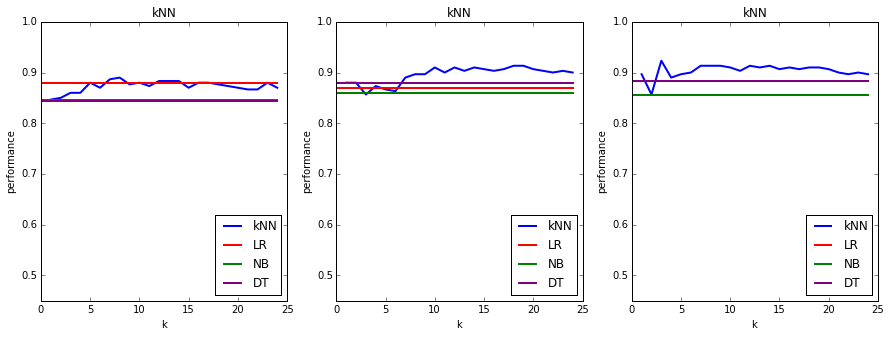

In [149]:
fig, ax = plt.subplots(1, DATASETS, figsize = (15, 5))

max_knn = 25

test_classifiers(X, y, max_knn, ax[0])
test_classifiers(X, q, max_knn, ax[1])
test_classifiers(X, r, max_knn, ax[2])